In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

In [2]:
url = 'https://www.j-archive.com/listseasons.php'
r = requests.get(url)
soup = BeautifulSoup(r.content)
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN" "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">\n<html xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <title>\n   J! Archive - Season list\n  </title>\n  <link href="http://www.j-archive.com/styles.css" rel="styleSheet" type="text/css"/>\n  <link href="http://www.j-archive.com/favicon.ico" rel="shortcut icon"/>\n </head>\n <body>\n  <div id="navbar">\n   <span id="navbarlogo">\n    <a href="http://www.j-archive.com">\n     <img alt="J! Archive" height="22" src="http://www.j-archive.com/j-a.gif" width="100"/>\n    </a>\n   </span>\n   <span id="navbartext">\n    <a href="http://www.j-archive.com/showseason.php?season=35">\n     [current season]\n    </a>\n    <a href="http://www.j-archive.com/showseason.php?season=34">\n     [last season]\n    </a>\n    <a href="http://www.j-archive.com/listseasons.php">\n     [all seasons]\n    </a>\n    <a href="http://www.j-archive.com/listprizes.php">\n     [prizes]\n    </a>\n    <

In [3]:
# Get links for seasons
season_links = []
for link in soup.find_all('a'):
    if 'http' not in link.get('href'):
        season_links.append(link.get('href'))
season_links

['showseason.php?season=35',
 'showseason.php?season=34',
 'showseason.php?season=33',
 'showseason.php?season=32',
 'showseason.php?season=31',
 'showseason.php?season=30',
 'showseason.php?season=29',
 'showseason.php?season=28',
 'showseason.php?season=27',
 'showseason.php?season=26',
 'showseason.php?season=25',
 'showseason.php?season=24',
 'showseason.php?season=23',
 'showseason.php?season=22',
 'showseason.php?season=21',
 'showseason.php?season=20',
 'showseason.php?season=19',
 'showseason.php?season=18',
 'showseason.php?season=17',
 'showseason.php?season=16',
 'showseason.php?season=15',
 'showseason.php?season=14',
 'showseason.php?season=13',
 'showseason.php?season=12',
 'showseason.php?season=11',
 'showseason.php?season=10',
 'showseason.php?season=9',
 'showseason.php?season=8',
 'showseason.php?season=7',
 'showseason.php?season=superjeopardy',
 'showseason.php?season=6',
 'showseason.php?season=5',
 'showseason.php?season=4',
 'showseason.php?season=3',
 'showseas

In [4]:
relevant_seasons = []
for i in season_links:
    season_url = 'https://www.j-archive.com/' + i
    r=requests.get(season_url)
    soup = BeautifulSoup(r.content)
    soup.prettify()
    for contestants in soup.find_all('td', {'valign': 'top'}):
        if 'Ken Jennings' in contestants.text or 'James Holzhauer' in contestants.text:
            relevant_seasons.append(i)
relevant_seasons = set(relevant_seasons)

In [5]:
relevant_seasons
# Just manually input the relevant seasons (not including seasons w/ special tournaments)
relevant_seasons = ['showseason.php?season=20', 'showseason.php?season=21','showseason.php?season=35']

In [6]:
# Get links for relevant episodes
relevant_episodes = []
for i in relevant_seasons:
    contestant_index = []
    season_url = 'https://www.j-archive.com/' + i
    r=requests.get(season_url)
    soup = BeautifulSoup(r.content)
    soup.prettify()
    for num, td in enumerate(soup.find_all('td', {'valign': 'top'})):
        if ('Ken Jennings game' in td.text) or ('James Holzhauer game' in td.text):
            contestant_index.append(num)
    link_index = [x - 2 for x in contestant_index]  
    for num, contestants in enumerate(soup.find_all('td', {'valign': 'top'})):
        if num in link_index:
            relevant_episodes.append(contestants.find('a').get('href'))

In [7]:
# Get 3 contestants final scores and date for each game James / Ken are on
episode_dict = {}
for num, show_url in enumerate(relevant_episodes):
    player_score_dict = {}
    r=requests.get(show_url)
    soup = BeautifulSoup(r.content)
    contestant_names = []
    for i in soup.find_all(class_ = 'score_player_nickname'):
        contestant_names.append(i.text)
    contestant_names = contestant_names[:3]
    contestant_scores = []
    try: 
        contestant_scores.append(soup.find('h3', text = 'Final scores:').find_next(class_='score_positive').text)
        contestant_scores.append(soup.find('h3', text = 'Final scores:').find_next(class_='score_positive').find_next(class_='score_positive').text)
        contestant_scores.append(soup.find('h3', text = 'Final scores:').find_next(class_='score_positive').find_next(class_='score_positive').find_next(class_='score_positive').text)
    except:
        pass
    results_dict = dict(zip(contestant_names, contestant_scores))
    episode_dict[soup.find('h1').text] = results_dict


In [9]:
# Convert date text to proper date, create list of Ken / James, date, and how much oneyt ehy won
from datetime import datetime

list_records = []
for k,v in episode_dict.items():
    start = k.index(',')+2
    start_date = k[start:]
    start_date = datetime.strptime(start_date, '%B %d, %Y').date()
    if 'Ken' in v:
        record = ['Ken',start_date, int(re.sub('[$,]','',v['Ken']))]
        list_records.append(record)
    elif 'James' in v:
        record = ['James',start_date, int(re.sub('[$,]','',v['James']))]
        list_records.append(record)
    else: 
        pass
list_records


[['Ken', datetime.date(2004, 7, 23), 75000],
 ['Ken', datetime.date(2004, 7, 22), 52000],
 ['Ken', datetime.date(2004, 7, 21), 30000],
 ['Ken', datetime.date(2004, 7, 20), 29200],
 ['Ken', datetime.date(2004, 7, 19), 35000],
 ['Ken', datetime.date(2004, 7, 16), 50000],
 ['Ken', datetime.date(2004, 7, 15), 28000],
 ['Ken', datetime.date(2004, 7, 14), 17500],
 ['Ken', datetime.date(2004, 7, 13), 32000],
 ['Ken', datetime.date(2004, 7, 12), 52000],
 ['Ken', datetime.date(2004, 7, 9), 52000],
 ['Ken', datetime.date(2004, 7, 8), 40000],
 ['Ken', datetime.date(2004, 7, 7), 40000],
 ['Ken', datetime.date(2004, 7, 6), 14000],
 ['Ken', datetime.date(2004, 7, 5), 19600],
 ['Ken', datetime.date(2004, 7, 2), 17600],
 ['Ken', datetime.date(2004, 7, 1), 40000],
 ['Ken', datetime.date(2004, 6, 30), 35000],
 ['Ken', datetime.date(2004, 6, 29), 40000],
 ['Ken', datetime.date(2004, 6, 28), 21000],
 ['Ken', datetime.date(2004, 6, 25), 48801],
 ['Ken', datetime.date(2004, 6, 24), 40000],
 ['Ken', datetime

In [10]:
df = pd.DataFrame(list_records)
df.columns = ['contestant','show_dt','winnings']
first_show = df.groupby('contestant').agg({'show_dt': ['min', 'max']})
first_show.columns = ['show_min', 'show_max']
df = df.merge(first_show, how='inner', on='contestant')
ken_df = df[df['contestant'] == 'Ken'].sort_values('show_dt').reset_index()
james_df = df[df['contestant'] == 'James'].sort_values('show_dt').reset_index()

In [77]:
print('James Jeopardy Stats:')
display(james_df.describe())
print('Ken Jeopardy Stats:')
display(ken_df.describe())

James Jeopardy Stats:


,index,winnings
count,33.00000,33.000000
mean,91.00000,75364.090909
std,9.66954,27305.851037
min,75.00000,24799.000000
25%,83.00000,54017.000000
50%,91.00000,74400.000000
75%,99.00000,90812.000000
max,107.00000,131127.000000


Ken Jeopardy Stats:


,index,winnings
count,75.000000,75.000000
mean,37.000000,33726.653333
std,21.794495,11511.822207
min,0.000000,8799.000000
25%,18.500000,27600.000000
50%,37.000000,31601.000000
75%,55.500000,40000.000000
max,74.000000,75000.000000


In [12]:
# Ken won total of $2,520,700, check that data matches (don't include last game where he gets $ for second place)
ken_winnings.iloc[-2]

2520700

In [17]:
# James was short of Ken's record by $58,484, check that the difference in scores equals this (exclude last game)
ken_winnings.iloc[-2] - james_winnings.iloc[-2]

58484

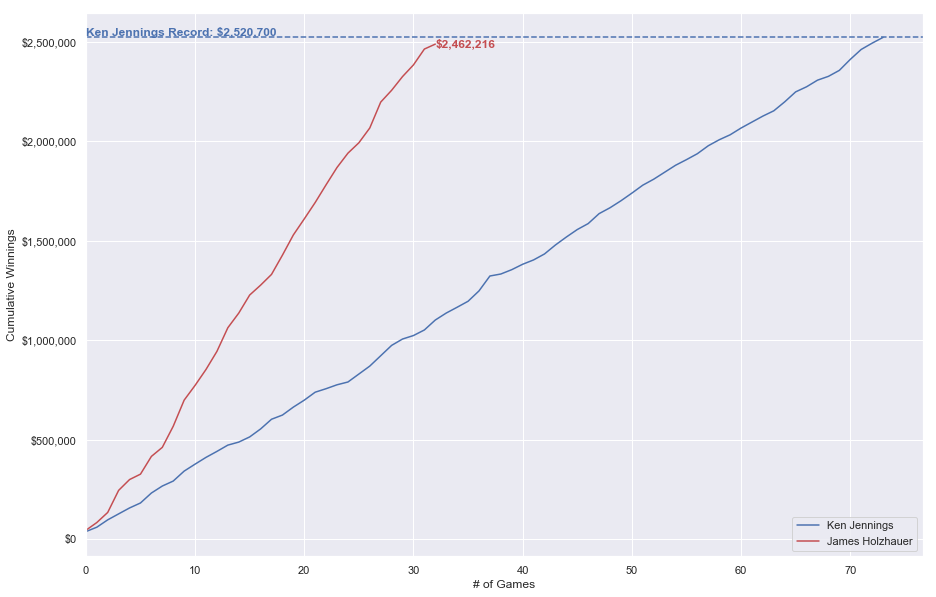

In [58]:
import matplotlib.ticker as ticker
sns.set(style="darkgrid")
ken_winnings = np.cumsum(ken_df['winnings'])
james_winnings = np.cumsum(james_df['winnings'])
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(ken_winnings[:-1], c='b', label='Ken Jennings');
plt.plot(james_winnings, c='r', label='James Holzhauer');
plt.xlabel('# of Games')
plt.ylabel('Cumulative Winnings')

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.axhline(ken_winnings.iloc[-2], ls='--')
plt.xlim(0)
plt.text(0,ken_winnings.iloc[-2], 'Ken Jennings Record: {ken_total}'.format(ken_total='${:,.0f}'.format(ken_winnings.iloc[-2])), ha='left', va='bottom', color='b',fontweight='semibold')
plt.text(len(james_winnings)-1, ken_winnings.iloc[-2], '{james_total}'.format(james_total='${:,.0f}'.format(james_winnings.iloc[-2])), ha='left', va='top', color='r',fontweight='semibold')
plt.legend();


In [61]:
james_games = len(james_winnings) -1
ken_games = len(ken_winnings) -1

In [63]:
# How much more did James have to wager in previous games to have broken Ken's record?
(ken_winnings.iloc[-2] - james_winnings.iloc[-2])/james_games

1827.625

In [66]:
# How many more games until he would have broken Ken's record? 
print((james_winnings.iloc[-2] / james_games))
ken_winnings.iloc[-2]/(james_winnings.iloc[-2] / james_games)

76944.25


32.760082787212816

In [73]:
# What were the min/max James winnings?
display(min(james_df['winnings']))
display(max(james_df['winnings']))
james_df.describe()

24799

131127

,index,winnings
count,33.00000,33.000000
mean,91.00000,75364.090909
std,9.66954,27305.851037
min,75.00000,24799.000000
25%,83.00000,54017.000000
50%,91.00000,74400.000000
75%,99.00000,90812.000000
max,107.00000,131127.000000


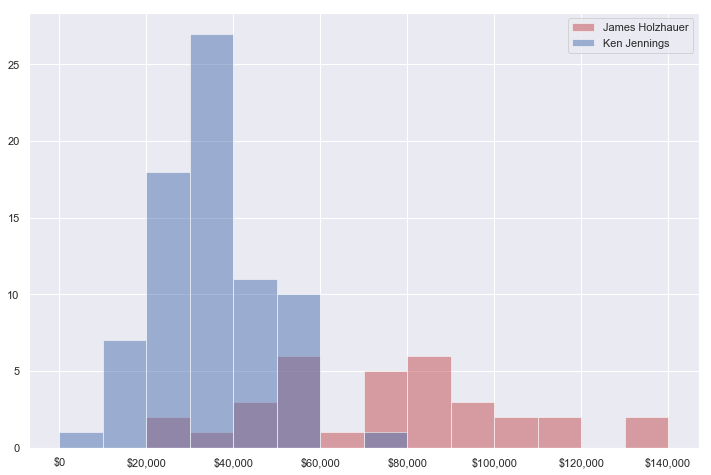

In [94]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(james_df['winnings'], alpha=.5, color='r', bins=range(0,150000,10000), label='James Holzhauer');
plt.hist(ken_df['winnings'], alpha=.5, color='b',bins=range(0,150000,10000), label='Ken Jennings');
plt.legend();
ax.xaxis.set_major_formatter(tick) ;

James at least hit Ken's day max around 50% of the time